In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
path = ('/content/drive/MyDrive/Data_Science /Data_set/Irbid_data_For_ML.csv')
df = pd.read_csv(path)
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
print(df.head())

            maxtempC  mintempC  avgtempC  totalprecipMM  windspeedKmph  \
date                                                                     
2008-07-01        35        22        28            0.0             11   
2008-07-02        35        21        28            0.0             11   
2008-07-03        34        21        27            0.0             10   
2008-07-04        35        19        27            0.0             12   
2008-07-05        34        22        28            0.0             11   

            sunhour  weatherCode  humidity  visibilityKm  pressureMB  ...  \
date                                                                  ...   
2008-07-01     13.6          113        52            10        1006  ...   
2008-07-02     13.6          113        52            10        1006  ...   
2008-07-03     13.6          113        57            10        1005  ...   
2008-07-04     13.6          113        57             9        1006  ...   
2008-07-05     13.6

In [3]:
features = df.drop(['maxtempC','mintempC','avgtempC'],axis = 1)
target = df[['maxtempC']]

In [4]:
scaler = MinMaxScaler()

features_scaled = scaler.fit_transform(features)
target_scaled = scaler.fit_transform(target).reshape(-1)

In [5]:
def create_dataset(X, y, time_steps=1):
  Xs, ys = [], []
  for i in range(len(X)-time_steps):
    Xs.append(X[i:(i+time_steps)])
    ys.append(y[i+time_steps])
  return np.array(Xs), np.array(ys)

In [6]:
time_steps = 7
X ,y = create_dataset(features_scaled,target_scaled,time_steps)

In [7]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [8]:
'''
model = Sequential([

    LSTM(units = 128,
         return_sequences = True,
         kernel_regularizer = l2(0.01),
         recurrent_regularizer = l2(0.01),
         input_shape = (X_train.shape[1],
                        X_train.shape[2])),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(units = 64,
         return_sequences = True,
         kernel_regularizer = l2(0.005)),
    BatchNormalization(),
    Dropout(0.25),

    LSTM(units = 64,
         return_sequences = True),
    BatchNormalization(),
    Dropout(0.2),

    LSTM(units = 32),
    BatchNormalization(),
    Dropout(0.2),

    Dense(units = 1)
])

model.compile(optimizer = 'adam',
              loss = 'mean_absolute_error',
              metrics = ['r2_score']
              )
'''

"\nmodel = Sequential([\n\n    LSTM(units = 128,\n         return_sequences = True,\n         kernel_regularizer = l2(0.01),\n         recurrent_regularizer = l2(0.01),\n         input_shape = (X_train.shape[1],\n                        X_train.shape[2])),\n    BatchNormalization(),\n    Dropout(0.3),\n\n    LSTM(units = 64,\n         return_sequences = True,\n         kernel_regularizer = l2(0.005)),\n    BatchNormalization(),\n    Dropout(0.25),\n\n    LSTM(units = 64,\n         return_sequences = True),\n    BatchNormalization(),\n    Dropout(0.2),\n\n    LSTM(units = 32),\n    BatchNormalization(),\n    Dropout(0.2),\n\n    Dense(units = 1)\n])\n\nmodel.compile(optimizer = 'adam',\n              loss = 'mean_absolute_error',\n              metrics = ['r2_score']\n              )\n"

In [9]:
model = Sequential([

    LSTM(units = 100,
         return_sequences = True,
         input_shape = (X_train.shape[1],
                        X_train.shape[2])),
    Dropout(0.2),
    LSTM(units = 50,
         return_sequences = True),
    Dropout(0.2),
    LSTM(units = 50,
         return_sequences = True),
    Dropout(0.2),
    LSTM(units = 50),
    Dropout(0.2),
    Dense(units = 1)
])

model.compile(optimizer = 'adam',
              loss = 'mean_squared_error')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 100)         │        48,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 7, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 7, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,451 (466.61 KB)

 Trainable params: 119,451 (466.61 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 7, 100)         │        48,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 7, 50)          │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 7, 50)          │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,451 (466.61 KB)

 Trainable params: 119,451 (466.61 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
Early_stop = EarlyStopping(monitor= 'val_loss',patience=2, restore_best_weights=True)

In [12]:
# prompt: Add check point

from tensorflow.keras.callbacks import ModelCheckpoint

# Specify a filepath where the model checkpoints will be saved
filepath = 'best_model_weights.weights.h5'  # Example filepath

model_checkpoint_callback = ModelCheckpoint(
    filepath=filepath,  # Add the filepath argument
    save_weights_only=True,
    monitor='val_loss',
    mode='min',
    save_best_only=True)

In [13]:
history = model.fit(X_train,
                    y_train,
                    epochs = 50,
                    batch_size = 16,
                    validation_data = (X_test, y_test),


                    verbose = 1)

model.save('amman_model.h5')


Epoch 1/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - loss: 0.0414 - val_loss: 0.0110
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0114 - val_loss: 0.0107
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0101 - val_loss: 0.0087
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0103 - val_loss: 0.0090
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0085 - val_loss: 0.0130
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - loss: 0.0086 - val_loss: 0.0068
Epoch 8/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - loss: 0.0080 - val_loss: 0.0052
Epoch 9/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0070 - val_loss: 0.0057
Epoch 10/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0066 - val_loss: 0.0054
Epoch 11/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 0.0064 - val_loss: 0.0053
Epoch 12/50
234/234 ━━━━━━━━━━━━━━━━━━━━

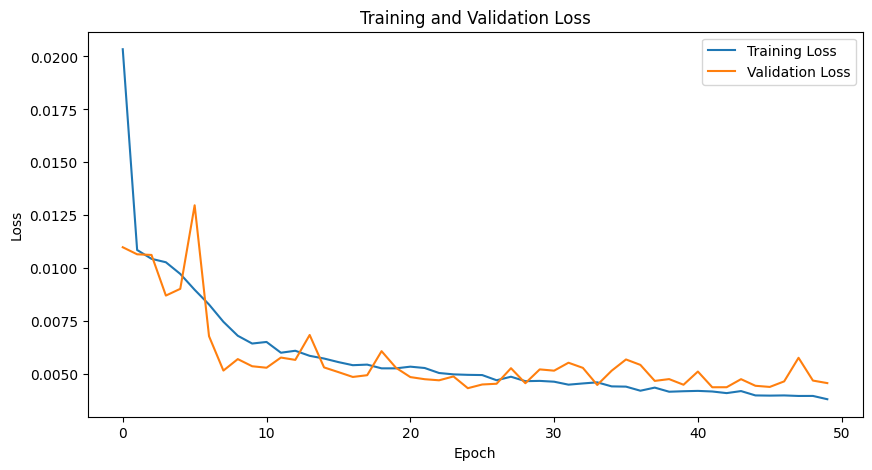

In [14]:
fig= plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step


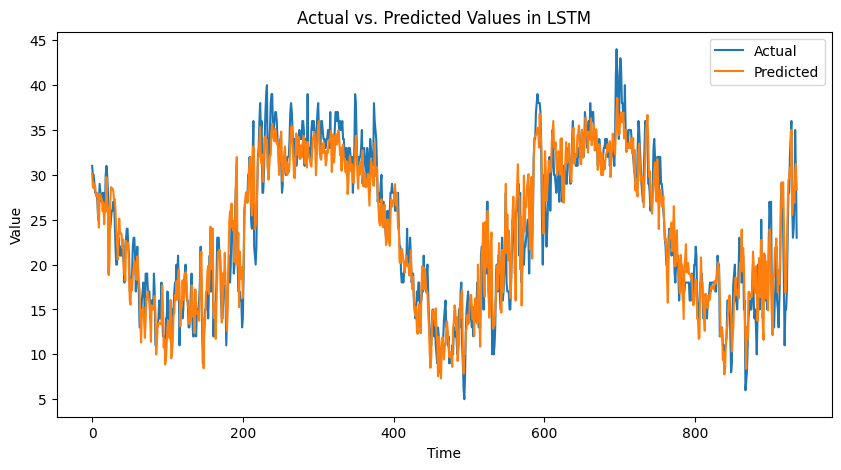

In [15]:
fig= plt.figure(figsize=(10,5))
y_pred = model.predict(X_test)
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual')
plt.plot(scaler.inverse_transform(y_pred), label='Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values in LSTM')
plt.legend()
plt.show()

In [16]:
X_train.shape

(3740, 7, 21)

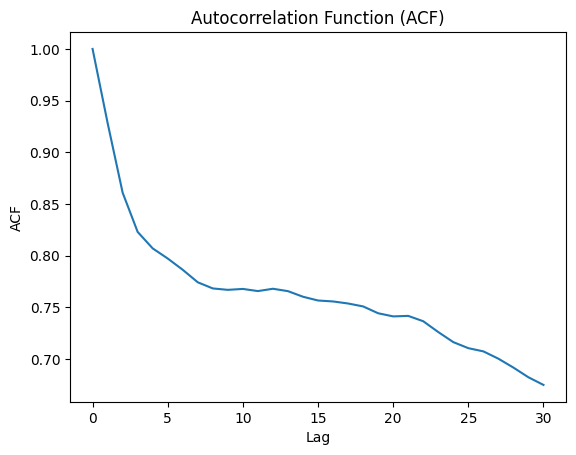

In [17]:
from statsmodels.tsa.stattools import acf
acf_values = acf(y_train, nlags=30)
plt.plot(acf_values)
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

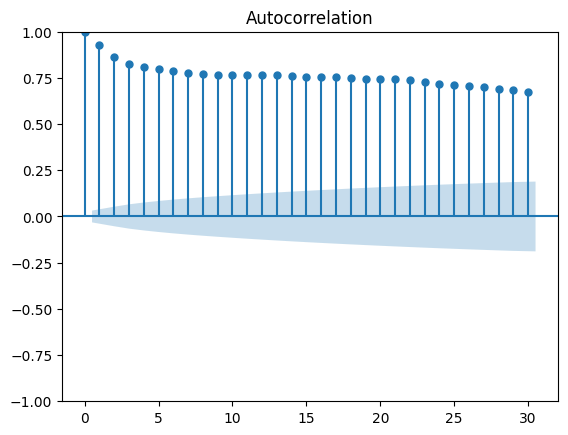

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y_train, lags=30)
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test, y_pred)
print("R2 Score:", R2)

R2 Score: 0.8907569476963675
